In [1]:
!pip install pygame

pygame 2.6.1 (SDL 2.28.4, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


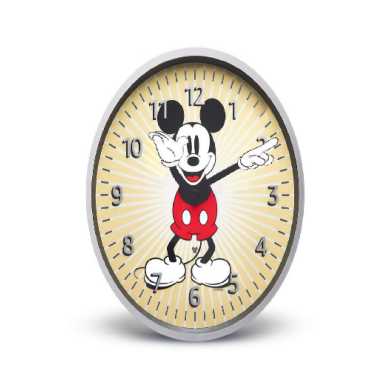

In [2]:
import pygame
import datetime
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
from PIL import Image

# Initialize Pygame
pygame.init()

# Set up screen
width, height = 500, 500
screen = pygame.Surface((width, height))

# Load clock image (use your own image path)
clock_bg = pygame.image.load("clock.png")
clock_bg = pygame.transform.scale(clock_bg, (width, height))

# Load hands (replace with extracted hand images)
minute_hand = pygame.image.load("rightarm.png")
second_hand = pygame.image.load("leftarm.png")

minute_hand = pygame.transform.rotozoom(minute_hand, 0, 0.5)
second_hand = pygame.transform.rotozoom(second_hand, 0, 0.5)

def draw_clock():
    screen.blit(clock_bg, (0, 0))  # Draw background

    now = datetime.datetime.now()
    minutes = now.minute
    seconds = now.second

    # Calculate angles
    minute_angle = -6 * minutes
    second_angle = -6 * seconds

    # Rotate hands
    rotated_minute = pygame.transform.rotate(minute_hand, minute_angle)
    rotated_second = pygame.transform.rotate(second_hand, second_angle)

    # Get new positions
    min_rect = rotated_minute.get_rect(center=(width//2, height//2))
    sec_rect = rotated_second.get_rect(center=(width//2, height//2))

    # Draw hands
    screen.blit(rotated_minute, min_rect.topleft)
    screen.blit(rotated_second, sec_rect.topleft)

# Display Pygame output in Jupyter
def show_pygame():
    draw_clock()
    img_str = pygame.image.tostring(screen, "RGB")
    img = Image.frombytes("RGB", (width, height), img_str)
    plt.imshow(np.array(img))
    plt.axis("off")
    plt.show()

# Run inside Jupyter
show_pygame()

## 3rd Problem

In [1]:
import tkinter as tk

# Constants
WIDTH, HEIGHT = 400, 400  # Window size
BALL_RADIUS = 25
STEP = 20  # Movement step

class BallGame:
    def __init__(self, root):
        self.canvas = tk.Canvas(root, width=WIDTH, height=HEIGHT, bg="white")
        self.canvas.pack()
        
        # Create the ball in the center
        self.x, self.y = WIDTH // 2, HEIGHT // 2
        self.ball = self.canvas.create_oval(self.x - BALL_RADIUS, self.y - BALL_RADIUS, 
                                            self.x + BALL_RADIUS, self.y + BALL_RADIUS, 
                                            fill="red")
        
        # Bind arrow keys
        root.bind("<Up>", self.move_up)
        root.bind("<Down>", self.move_down)
        root.bind("<Left>", self.move_left)
        root.bind("<Right>", self.move_right)

    def move_ball(self, dx, dy):
        """Move ball while keeping it inside the window."""
        new_x, new_y = self.x + dx, self.y + dy
        
        # Check boundaries
        if BALL_RADIUS <= new_x <= WIDTH - BALL_RADIUS and BALL_RADIUS <= new_y <= HEIGHT - BALL_RADIUS:
            self.x, self.y = new_x, new_y
            self.canvas.move(self.ball, dx, dy)

    def move_up(self, event): self.move_ball(0, -STEP)
    def move_down(self, event): self.move_ball(0, STEP)
    def move_left(self, event): self.move_ball(-STEP, 0)
    def move_right(self, event): self.move_ball(STEP, 0)

# Run the game
root = tk.Tk()
root.title("Moving Ball")
game = BallGame(root)
root.mainloop()
